Power Method
-------------

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import sklearn.datasets as skdata


In [ ]:


ds_1 = xr.open_dataset("/home/pietaril/Documents/data/regions_verify_isotope_202112_cov.nc")
bio_1 = ds_1["covariance_bio"]
anth_1 = ds_1["covariance_anth"]

ds_2 = xr.open_dataset("/home/pietaril/Documents/data/regions_verify_202104_cov.nc")
bio_2 = ds_2["covariance_bio"]
anth_2 = ds_2["covariance_anth"]

M = bio_2.values

In [54]:
#!/usr/bin/env python3

import numpy as np
import numpy.linalg as linalg

def power_step(A, w0):
    """Computes one step in power method to compute an approximation for dominant
    eigenpair of A"""
    w = A@w0
    norm = linalg.norm(w)
    w = w/norm
    mu = w.T@A@w
    return mu, w

def first_eigpair(A, n_iterations: int):
    """A slightly modified version of
    the function power_iteration retrieved from 
    https://en.wikipedia.org/wiki/Power_iteration
    (Retrieved: 8.9.2022)
    Function computes n_iterations of power_method 
    and returns the dominant eigenpair of each step"""

    dimA = A.shape[1]

    #initialize
    W_T = np.zeros((n_iterations, dimA))
    mus = np.zeros(n_iterations)
    w0 = np.random.rand(dimA)
    norm = np.linalg.norm(w0)
    #normalize
    w0 = w0 / norm

    #assign values in row order bc numpy row major
    for i in np.arange(n_iterations):
        mui, wi = power_step(A, w0)
        mus[i] = mui
        W_T[i,:] = wi
        w0 = wi
        

    return mus, W_T



def hotelling2(A, v, mu, n_iterations):
    """Function to compute the second eigenvector after the largest
    eigenvalue and corresponding eigenvector has been computed.
    Function utilizes Hotelling's method.
    Parameters:
    A : 2D array
    v : 1D array. Approximated eigenvector corresponding to the approximated largest eigenvalue of A. 
    a : float. Approximation of largest eigenvalue of A.
    n_iterations : int"""

    dimA = A.shape[1]
    W_T = np.zeros((n_iterations, dimA))
    mus = np.zeros(n_iterations)
    w0 = np.random.rand(dimA)
    norm = np.linalg.norm(w0)
    #normalize
    w0 = w0 / norm

    for i in np.arange(n_iterations):
        wi = A@w0-mu*(v.T@w0)*v
        norm = np.linalg.norm(wi)
        #normalize
        wi = wi / norm
        mui = wi.T@A@wi
        mus[i] = mui
        W_T[i,:] = wi
        w0 = wi
        

    return mus, W_T

def residual_norm(A, v, mu):
    """Compute the 2-norm of the residual vector r = Av-av, where
    A is a 2-d numpy array, v an approximated eigenvector and a is an approximation of
    corresponding eigenvalue. Can be used to evaluate the accuracy of the estimated
    eigenvector and -value."""
    r = A@v-mu*v
    norm = np.linalg.norm(r)

    return norm

def rel_residual(A, v, mu):
    abs_res = residual_norm(A, v, mu)
    rel = abs_res/np.linalg.norm(A@v)

    return rel

def abs_err(v_exact, mu_exact, v_approx, mu_approx):
    err_v = np.linalg.norm(v_exact-v_approx)
    err_mu = abs(mu_exact-mu_approx)

    return err_mu, err_v

def rel_err(v_exact, mu_exact, v_approx, mu_approx):
    err_mu, err_v = abs_err(v_exact, mu_exact, v_approx, mu_approx)
    rel_mu = err_mu / abs(mu_exact)
    rel_v = err_v / np.linalg.norm(v_exact)
    
    return rel_mu, rel_v


# def hotelling(A, v, mu, n_vectors, n_iterations):
#     """NEEDS FIXING
#     Function that uses Hotelling's deflation
#     method to compute the eigenvectors that
#     correspond to the second, third, ... , (n_vectors)th
#     largest eigenvalues along
#     with their corresponding eigenvector. The largest eigenvalue
#     and corresponding eigenvector need to have been computed first.
#     Returns n_vectors eigenvectors as rows of an array and the eigenvalues
#     as a list in descending order"""

#     n = A.shape[1]
#     #array for storing the eigenvectors as its rows
#     V_T = v

#     #list for storing the eigenvalues
#     mu_s = np.array(mu)

#     #array with mu*v as columns
#     V_mu = mu*v
    

#     #each new eigenvector and eigenvalue computed iteratively
#     #using the previously computed ones
#     for i in np.arange(n_vectors-1):
        
#         #initial guess
#         w0 = np.random.rand(n)
#         norm = np.linalg.norm(w0)
#         #normalize
#         w0 = w0/norm
    
#         #power iteration
#         for j in np.arange(n_iterations):
#             #Hotelling's deflation
#             wj = A.dot(w0)-V_mu.dot(V_T.dot(w0))

#             norm = np.linalg.norm(wj)

#             #normalize
#             w0 = wj / norm
        
#         #calculate corresponding eigenvalue
#         mu0 = rayleigh_quotient(A, w0)

#         # store the eigenvector and eigenvalues 
#         V_T = np.row_stack((V_T, w0))
#         mu_s = np.append(mu_s, mu0)
#         V_mu = np.column_stack((V_mu, mu0*w0))

#     return V_T, mu_s 



In [56]:
A = np.diag([1,4])

mus, ws = first_eigpair(A, 20)

print(mus)
print(ws)


[3.37371852 3.95133256 3.99691131 3.99980677 3.99998792 3.99999925
 3.99999995 4.         4.         4.         4.         4.
 4.         4.         4.         4.         4.         4.
 4.         4.        ]
[[4.56903154e-01 8.89516446e-01]
 [1.27367502e-01 9.91855594e-01]
 [3.20868075e-02 9.99485086e-01]
 [8.02557602e-03 9.99967795e-01]
 [2.00645459e-03 9.99997987e-01]
 [5.01614593e-04 9.99999874e-01]
 [1.25403663e-04 9.99999992e-01]
 [3.13509160e-05 1.00000000e+00]
 [7.83772900e-06 1.00000000e+00]
 [1.95943225e-06 1.00000000e+00]
 [4.89858063e-07 1.00000000e+00]
 [1.22464516e-07 1.00000000e+00]
 [3.06161289e-08 1.00000000e+00]
 [7.65403223e-09 1.00000000e+00]
 [1.91350806e-09 1.00000000e+00]
 [4.78377014e-10 1.00000000e+00]
 [1.19594254e-10 1.00000000e+00]
 [2.98985634e-11 1.00000000e+00]
 [7.47464085e-12 1.00000000e+00]
 [1.86866021e-12 1.00000000e+00]]


Random matrices for numerical examples
--------------------------------------

In [26]:

def create_sym_mirror(n:int):
    """Create random symmetric matrix by first making random square and then mirroring
    lower triangular values to upper triangular"""
    #random square
    #uniform [0,1]
    M = np.random.rand(n,n)
    #std normal
    #M = np.random.standard_normal((n,n)) 
    #set values above diagonal to zero
    M = np.tril(M)
    i_lower = np.tril_indices(n)
    #make symmetric
    M.T[i_lower] = M[i_lower]
    return M

def create_sym_XXT(n:int):
    M = np.random.standard_normal((n,n))
    M = M@M.T
    return M


In [28]:


n = 20 # how many rows & cols
N = 16 # how many matrices

#which function to use to simulate matrices
create_matrix = create_sym_XXT

#make_spd_matrix seems to generate matrices with very similar eigenvalue structure
#Ms = [skdata.make_spd_matrix(n) for i in np.arange(N)] 

Ms = [create_matrix(n) for i in np.arange(N)]





# The 'real' eigenvalues and vectors

Note: they are in ascending order

In [29]:
all_eigvals = []
all_eigvecs = []

#(NOTE: I might need to worry abot how the order treats negative values if matrices not positive (semi)definite (i.e. if they have negative eigenvals)

for M in Ms:
    eigvals, eigvecs = np.linalg.eigh(M)
    all_eigvals.append(eigvals)
    all_eigvecs.append(eigvecs)
    print(eigvals)

[ 0.10494958  0.15051962  0.25294996  0.61096778  2.48874304  2.98728812
  5.84913963  6.79522404  9.76814786 13.64501296 16.65448283 18.57852005
 20.8087923  23.62028774 27.27777076 33.88465993 35.54968033 47.25082249
 54.86658962 83.65354828]
[1.03333273e-03 3.05509503e-01 1.12297285e+00 1.38507577e+00
 2.97250554e+00 3.90000790e+00 5.76947742e+00 6.26136571e+00
 7.07877356e+00 8.75412491e+00 1.30725374e+01 1.54392368e+01
 2.11037612e+01 2.34227984e+01 2.45578071e+01 3.22969169e+01
 4.02606100e+01 5.01310036e+01 5.72068859e+01 6.51020646e+01]
[1.83419904e-02 4.12863202e-01 8.42960523e-01 1.02033884e+00
 1.72830039e+00 5.07502302e+00 5.63176029e+00 8.42729692e+00
 1.01670242e+01 1.40241225e+01 1.47154519e+01 1.96771909e+01
 2.11902812e+01 2.41311395e+01 2.83707864e+01 3.63952386e+01
 4.34551402e+01 5.06059704e+01 5.39999160e+01 6.45916895e+01]
[2.62186491e-02 3.62242366e-01 6.19562846e-01 1.30324122e+00
 1.92827457e+00 3.12270706e+00 5.00358762e+00 5.61470699e+00
 9.59893500e+00 1.092

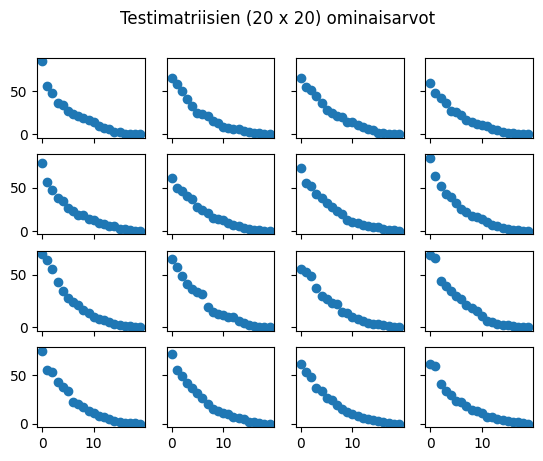

In [30]:

fig, axs = plt.subplots(4,4, sharex='col', sharey = 'row')
for i, ax in enumerate(fig.axes):
    ax.scatter(np.arange(n), all_eigvals[i][::-1]) #need to reverse the order of the eigvalues, because np.linalg.eigh gives them in ascending order
    #ax.set_xlabel("Indeksi")
    #ax.set_ylabel("Ominaisarvo")
fig.suptitle(f"Testimatriisien ({n} x {n}) ominaisarvot")
plt.show()

In [31]:
iterations = np.arange(1,16)
VT, power_evals = power_method(M,2,1) 
for i in range(1,15):
    V_T, mu_s = power_method(M,2,iterations[i])
    power_evals = np.row_stack((power_evals,mu_s))


print(power_evals)

[[52.59192118 29.54867237]
 [42.2363788  54.69896439]
 [60.01284322 49.69843826]
 [58.76428154 59.06836207]
 [60.71426939 49.29654502]
 [61.61309243 50.88581927]
 [61.18984171 50.09069486]
 [60.75180428 60.34811315]
 [61.70189711 59.57794977]
 [61.29891248 60.01084837]
 [61.28243166 57.70130155]
 [61.22506466 60.07368171]
 [60.47430262 60.8267237 ]
 [61.24449696 60.07570884]
 [61.67718414 59.61149668]]


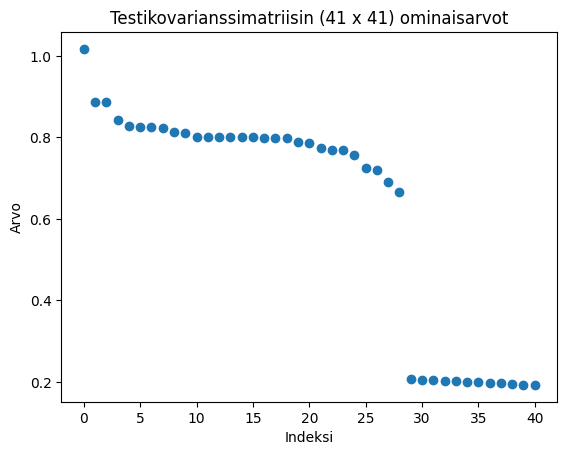

Quick checks how the rows and columns work with different commands

In [51]:

u = np.ones(5)
w = np.ones(5)*2
u_T = np.array([u])
uw_T = np.row_stack((u,w))
uw = np.column_stack((u,w))
print(uw)
print(uw_T)
print(uw_T.dot(uw))


uw.shape

[[1. 2.]
 [1. 2.]
 [1. 2.]
 [1. 2.]
 [1. 2.]]
[[1. 1. 1. 1. 1.]
 [2. 2. 2. 2. 2.]]
[[ 5. 10.]
 [10. 20.]]


(5, 2)

Truncated SVD
--------------

Implementing truncated SVD as an estimate of the matrix inverse

The version with reduced dimensions in V and D

In [159]:
#Number of largest eigenvalues to include
r = 3000
#evals in descending order
t_evals = evals[::-1].copy()
#take only the first r evals
t_evals = t_evals[:r]
#replace the remaining eigenvalues with their reciprocal
t_evals = 1/t_evals
#evecs to the same order as evals
t_evecs = np.fliplr(evecs.copy())
#take only the first r evecs
t_evecs = t_evecs[:,:r]





Version with full dimensions in V and D, and the "discarded" vectors and eigenvalues set to zero

In [134]:
#Number of largest eigenvalues to include
r = 200
#evals in descending order
t_evals = evals[::-1].copy()
#set all but the r largest evals to zero
t_evals[r:] = 0
#replace the r largest eigenvalues with their reciprocal
t_evals[:r] = 1/t_evals[:r]
#evecs in the same order as evals
t_evecs = np.fliplr(evecs.copy())
#set all but the r first eigvecs to zero vectors
t_evecs[:,r:] = 0

array([[0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

In [131]:
act_invM = np.linalg.inv(M)

In [160]:
Mtsvd = t_evecs.dot(np.diag(t_evals)).dot(t_evecs.T) 

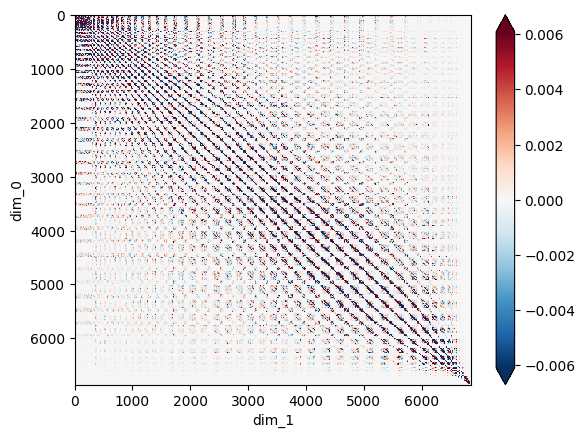

In [161]:
Mtsvd = xr.DataArray(Mtsvd)
fig, ax = plt.subplots()
Mtsvd.plot.imshow(yincrease = False, robust = True)
plt.show()

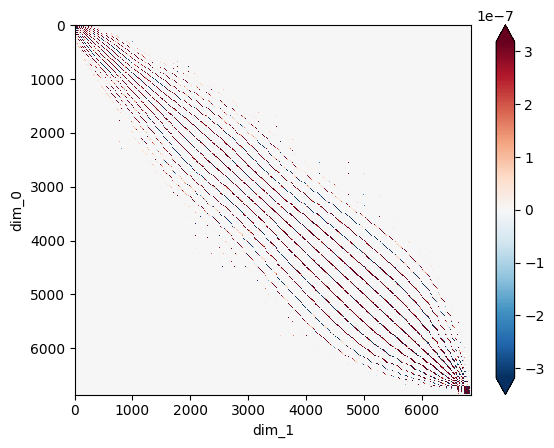

In [137]:
act_invM = xr.DataArray(act_invM)
fig, ax = plt.subplots()
act_invM.plot.imshow(yincrease = False, robust = True)
plt.show()

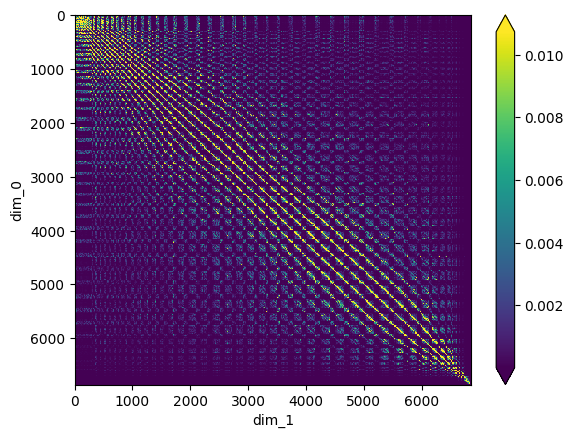

In [162]:
M_diff = xr.DataArray(abs(act_invM-Mtsvd))
ig, ax = plt.subplots()
M_diff.plot.imshow(yincrease = False, robust = True)
plt.show()


Testing the convergence of the eigenvalue estimates
---------------------------------------------------

In [7]:

print(evals[range(-1,-500,-1)])



[15.15454765 11.69482561 10.32612078  9.96130532  9.89193315  9.75719582
  9.24783414  9.15443245  8.89805937  8.89677888  8.70833449  8.57827471
  8.480616    8.442306    8.37016884  8.20974608  8.16437133  8.12131873
  7.97676669  7.93956906  7.82334086  7.81316668  7.66265984  7.58205222
  7.50829735  7.48964067  7.33508437  7.26973259  7.26901381  7.21151976
  7.18736552  7.1623497   7.12815879  7.00966882  7.0044297   6.93104487
  6.88485598  6.8072074   6.78371445  6.73600985  6.69717811  6.65563704
  6.62729434  6.55959354  6.54931686  6.53780389  6.46489517  6.45807605
  6.37861479  6.3361404   6.33305796  6.33159464  6.30818108  6.29554585
  6.27008196  6.22122141  6.2076039   6.19458915  6.0942128   6.07730724
  6.06229881  6.04101702  6.02316135  5.98209365  5.95785506  5.94728766
  5.90496726  5.88136927  5.83020675  5.82703167  5.80729998  5.77127834
  5.75486824  5.73679809  5.71804387  5.67364378  5.65498058  5.63677967
  5.61045504  5.59369332  5.56463454  5.55684648  5

[[41.69398988 40.68340295 29.03596293]
 [59.19740884 36.55905608 53.77347525]
 [56.35415908 60.30786493 46.8153088 ]
 [60.87062338 58.2856431  40.46719661]
 [60.43204611 58.63371482 35.56816026]
 [60.9048315  57.49995779 44.7535011 ]
 [61.34293908 59.86549126 40.43935396]
 [61.4802906  59.78115983 40.79964355]
 [61.18213039 60.01725471 40.49257547]
 [61.07824574 57.51974078 37.74388108]
 [60.12012747 61.20164293 40.6274037 ]
 [61.10746712 60.21686274 40.21180584]
 [61.7524622  59.38667144 40.98070048]
 [61.28019846 60.00992505 40.89802346]
 [59.74060005 61.56375597 40.83990771]]


In [38]:
evals, evecs = np.linalg.eigh(M)

n_iter = 20
iterations = np.arange(1,16)
VT, power_evals = power_method(M,3,1) 
for i in range(1,15):
    V_T, mu_s = power_method(M,3,iterations[i])
    power_evals = np.row_stack((power_evals,mu_s))


print(power_evals)

[[52.02356315 33.90706212 43.94993649]
 [49.10401612 51.66646294 41.96395267]
 [60.36808201 40.990823   51.96508792]
 [60.99984255 57.01208443 39.09812069]
 [61.37856984 54.41930812 48.02693584]
 [61.44123318 39.29016884 59.3881347 ]
 [61.23289973 59.48572435 39.34482874]
 [61.15409471 60.01070438 40.68676257]
 [60.84660152 60.20543628 40.75799227]
 [60.46609655 60.79488581 37.71938694]
 [61.23833384 60.00807253 40.90334319]
 [61.00711854 45.94002193 57.3783699 ]
 [61.09805491 60.22457101 40.67356039]
 [61.72669823 59.56767278 40.73741098]
 [61.77901081 59.51167601 40.83178286]]


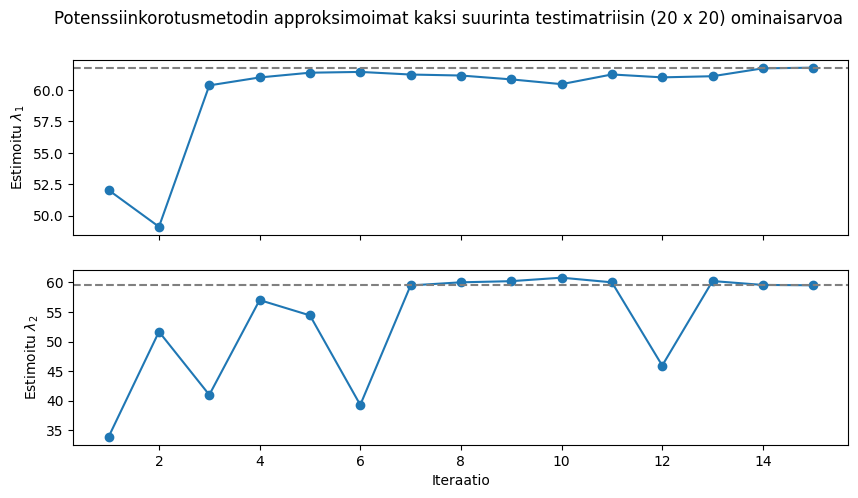

In [39]:
import matplotlib.pyplot as plt
labels = [r'$\lambda_1$', r'$\lambda_2$', r'$\lambda_3$']

fig, axs = plt.subplots(2,1, figsize = (10,5), sharex='col')
for i in range(2):
    axs[i].plot(iterations, power_evals[:,i], marker = 'o')
    axs[i].axhline(y=evals[-(i+1)], linestyle = 'dashed', color = 'grey')
    axs[i].set_ylabel(f"Estimoitu {labels[i]}")
axs[1].set_xlabel("Iteraatio")
fig.suptitle(f"Potenssiinkorotusmetodin approksimoimat kaksi suurinta testimatriisin ({n} x {n}) ominaisarvoa")
plt.tight_layout
plt.show()

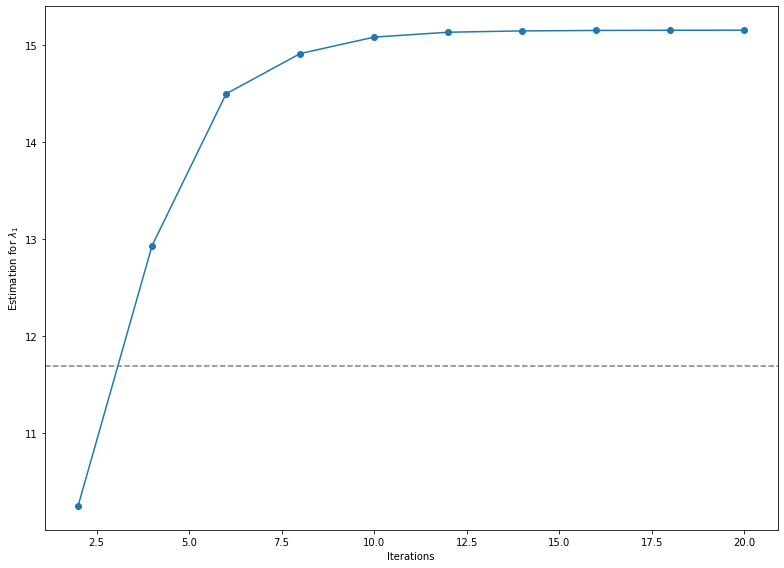

In [36]:
fig, ax = plt.subplots(figsize = (11,8), layout = 'tight', sharex='row')
ax.plot(iterations, power_evals[:,0], marker = 'o')
ax.axhline(y=evals[-(i+1)], linestyle = 'dashed', color = 'grey')
ax.set_ylabel(f"Estimation for {labels[0]}")
ax.set_xlabel("Iterations")
plt.show()

In [75]:
largest_evecs = evecs[range(-1,-11,-1)]
residuals = []
diffs = []
for i in range(10):
    residual = residual_norm(M, V_T[i], mu_s[i])
    residuals.append(residual)
    diff = np.linalg.norm(largest_evecs[i]-V_T[i])
    diffs.append(diff)
print(residuals)
print(diffs)




[3.4060245772776416e-11, 3.618968745565533e-06, 0.009194577471923478, 0.024766905747349317, 0.02288058312727909, 0.04620733890848414, 0.0492595791563369, 0.0848178556572693, 0.0868597470467658, 0.12367572420895566]
[1.4142135623730951, 1.4142135623730945, 1.4142135623717602, 1.4142135622969043, 1.4142135623339784, 1.4142135586715225, 1.414213514188876, 1.414213525606388, 1.4142134352976992, 1.414213321693363]


In [67]:
eval1/eval2

1.295833572422536

In [58]:
print(largest_evecs[0])
print(V_T[0])

[0. 0. 0. ... 0. 0. 0.]
[1.02238389e-17 3.17420128e-17 4.43083516e-17 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]


In [18]:

# check if the real and approximated eigenvector linearly dependent
A = np.stack((v_2, evec2), axis=1)
np.linalg.matrix_rank(A)



2

11.694825610284667


In [7]:
for i in np.arange(len(evec1)):
    x = evec1[i]
    if x != 0.0:
        print(i,x)

11 1.0


In [51]:
for i in range(50,400,50):
    v_2 = hotelling2(M, v, a, i)
    a_2 = rayleigh_quotient(M, v_2)
    norm = residual_norm(M, v_2, a_2)
    print(f"Iteration {i}, residual norm: {norm}")
    

Iteration 50, residual norm: 0.002694597137400284
Iteration 100, residual norm: 0.00023027591081764133
Iteration 150, residual norm: 6.717010804712341e-05
Iteration 200, residual norm: 0.00014071462095937545
Iteration 250, residual norm: 0.00015732072384204554
Iteration 300, residual norm: 0.00018789944059598136
Iteration 350, residual norm: 1.0853296793970103e-06


In [49]:
#print(f"Real eigval: {eval1}")


for i in range(100,1000, 100):
    v = power_iteration(M, i)
    a = rayleigh_quotient(M, v)
    norm = residual_norm(M, v, a)
    print(f"Iteration: {i}, residual norm: {norm}")
    #print(f"Iteration: {i}, estimated eigval: {a}, residual norm: {norm}")
    
    

Iteration: 100, residual norm: 1.0367997085054587e-07
Iteration: 200, residual norm: 2.0375336947625995e-13
Iteration: 300, residual norm: 5.551169297415832e-17
Iteration: 400, residual norm: 5.551157474611588e-17
Iteration: 500, residual norm: 5.551157474611588e-17
Iteration: 600, residual norm: 5.551157474611588e-17
Iteration: 700, residual norm: 5.551157474611588e-17
Iteration: 800, residual norm: 5.551157474611588e-17
Iteration: 900, residual norm: 5.551157474611588e-17
